## Telecom churn case study

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

In this project, you will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

## STEP 1 : Importing Libraries

In [1]:
# import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 300)

## STEP 2 : Reading and Understanding Data

In [2]:
# Creating a DataFrame for the CSV

churn = pd.read_csv("Company Data.csv")


# Checking the type of information present in our DataFrame

churn.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [3]:
# Checking shape of the DataFrame to confirm number of features and datapoints present in it

churn.shape

(99999, 226)

In [4]:
# Let's check some high level information of our data

churn.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #    Column                    Non-Null Count  Dtype  
---   ------                    --------------  -----  
 0    mobile_number             99999 non-null  int64  
 1    circle_id                 99999 non-null  int64  
 2    loc_og_t2o_mou            98981 non-null  float64
 3    std_og_t2o_mou            98981 non-null  float64
 4    loc_ic_t2o_mou            98981 non-null  float64
 5    last_date_of_month_6      99999 non-null  object 
 6    last_date_of_month_7      99398 non-null  object 
 7    last_date_of_month_8      98899 non-null  object 
 8    last_date_of_month_9      98340 non-null  object 
 9    arpu_6                    99999 non-null  float64
 10   arpu_7                    99999 non-null  float64
 11   arpu_8                    99999 non-null  float64
 12   arpu_9                    99999 non-null  float64
 13   onnet_mou_6               96062 non-null  fl

In [6]:
# let's also check some statistics like spread in the data, mean, smallest and highest values, etc.

churn.describe(include='all')

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999,99398,98899,98340,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000

## STEP 3 : Data Cleaning
###        - Handling missing values 

In [5]:
# Checked and found missing values are present in our DataFrame

round(churn.isnull().sum()*100/len(churn), 2)

mobile_number                0.00
circle_id                    0.00
loc_og_t2o_mou               1.02
std_og_t2o_mou               1.02
loc_ic_t2o_mou               1.02
last_date_of_month_6         0.00
last_date_of_month_7         0.60
last_date_of_month_8         1.10
last_date_of_month_9         1.66
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
arpu_9                       0.00
onnet_mou_6                  3.94
onnet_mou_7                  3.86
onnet_mou_8                  5.38
onnet_mou_9                  7.75
offnet_mou_6                 3.94
offnet_mou_7                 3.86
offnet_mou_8                 5.38
offnet_mou_9                 7.75
roam_ic_mou_6                3.94
roam_ic_mou_7                3.86
roam_ic_mou_8                5.38
roam_ic_mou_9                7.75
roam_og_mou_6                3.94
roam_og_mou_7                3.86
roam_og_mou_8                5.38
roam_og_mou_9                7.75
loc_og_t2t_mou

### i. Replacing NaN values in categorical variables

We will replace missing values in the categorical values with '-1' where '-1' will be a new category.

In [8]:
# Creating a list of categorical columns so as to impute missing values with '-1' in them

cat_cols = ['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'night_pck_user_9',
            'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9']


# Imputing '-1' using lambda function

churn[cat_cols] = churn[cat_cols].apply(lambda x: x.fillna(-1))

### ii. Imputing with 0

By observing the data, it is known that both the recharge and recharge date are null together in some rows. It means that the customer has not made any recharge. Therefore,

`Assumption: If the customer has not made any recharge, we can impute it with 0`

In [9]:
# Creating a list of columns in which we wish to impute '0'

impute_with_zero_cols = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 
                         'total_rech_data_9', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 
                         'av_rech_amt_data_8', 'av_rech_amt_data_9', 'max_rech_data_6', 
                         'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9']


# impute missing values with 0 using lambda function

churn[impute_with_zero_cols] = churn[impute_with_zero_cols].apply(lambda x: x.fillna(0))

In [10]:
# Now, that we have imputed '0' in some numerical columns, let's check to make sure that values are
# imputed correctly in them

print(churn[impute_with_zero_cols].isnull().sum()*100/len(churn))

total_rech_data_6     0.0
total_rech_data_7     0.0
total_rech_data_8     0.0
total_rech_data_9     0.0
av_rech_amt_data_6    0.0
av_rech_amt_data_7    0.0
av_rech_amt_data_8    0.0
av_rech_amt_data_9    0.0
max_rech_data_6       0.0
max_rech_data_7       0.0
max_rech_data_8       0.0
max_rech_data_9       0.0
dtype: float64


### iii. Dropping unwanted columns

Since we know whether the customer has made a recharge or not, we will no longer need dates columns as well as their id columns

In [11]:
# Creating list of column_names, based on above mentioned assumption, so as to remove such columns 
# from our DataFrame

id_cols = ['mobile_number', 'circle_id']

date_cols = ['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 
             'last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7', 
             'date_of_last_rech_8', 'date_of_last_rech_9', 'date_of_last_rech_data_6', 
             'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'date_of_last_rech_data_9']


# Using 'drop' to remove the columns from our DataFrame

churn = churn.drop(id_cols + date_cols, axis=1)
churn.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,0.0,0.0,0.0,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,0.0,0.0,0.0,NaN,1.0,1.0,1.0,NaN,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,212.17,212.17,212.17,NaN,212.17,212.17,212.17,NaN,0.0,0.0,0.0,-1.0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1.0,1.0,1.0,-1.0,968,30.4,0.0,101.20,3.58
1,0.0,0.0,0.0,34.04

### iv. Dropping cols which have more than 70% of missing values

In [12]:
# In order to drop columns having more and 70% values missing in them, let's first check each column
# for %age of missing values present in it

round(churn.isnull().sum()*100/len(churn), 2)

loc_og_t2o_mou         1.02
std_og_t2o_mou         1.02
loc_ic_t2o_mou         1.02
arpu_6                 0.00
arpu_7                 0.00
arpu_8                 0.00
arpu_9                 0.00
onnet_mou_6            3.94
onnet_mou_7            3.86
onnet_mou_8            5.38
onnet_mou_9            7.75
offnet_mou_6           3.94
offnet_mou_7           3.86
offnet_mou_8           5.38
offnet_mou_9           7.75
roam_ic_mou_6          3.94
roam_ic_mou_7          3.86
roam_ic_mou_8          5.38
roam_ic_mou_9          7.75
roam_og_mou_6          3.94
roam_og_mou_7          3.86
roam_og_mou_8          5.38
roam_og_mou_9          7.75
loc_og_t2t_mou_6       3.94
loc_og_t2t_mou_7       3.86
loc_og_t2t_mou_8       5.38
loc_og_t2t_mou_9       7.75
loc_og_t2m_mou_6       3.94
loc_og_t2m_mou_7       3.86
loc_og_t2m_mou_8       5.38
loc_og_t2m_mou_9       7.75
loc_og_t2f_mou_6       3.94
loc_og_t2f_mou_7       3.86
loc_og_t2f_mou_8       5.38
loc_og_t2f_mou_9       7.75
loc_og_t2c_mou_6    

In [13]:
# As seen above, following columns have values missing for more than 75% times. Creating a list of
# such columns

cols_with_missing_values = ['count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 
                            'count_rech_2g_9', 'count_rech_3g_6', 'count_rech_3g_7', 
                            'count_rech_3g_8', 'count_rech_3g_9', 'arpu_3g_6', 'arpu_3g_7', 
                            'arpu_3g_8', 'arpu_3g_9', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 
                            'arpu_2g_9']

In [14]:
# Using 'drop' to remove columns mentioned above

churn = churn.drop(cols_with_missing_values, axis=1)


# Checking again for columns containing missing values

round(churn.isnull().sum()*100/len(churn), 2)

loc_og_t2o_mou        1.02
std_og_t2o_mou        1.02
loc_ic_t2o_mou        1.02
arpu_6                0.00
arpu_7                0.00
arpu_8                0.00
arpu_9                0.00
onnet_mou_6           3.94
onnet_mou_7           3.86
onnet_mou_8           5.38
onnet_mou_9           7.75
offnet_mou_6          3.94
offnet_mou_7          3.86
offnet_mou_8          5.38
offnet_mou_9          7.75
roam_ic_mou_6         3.94
roam_ic_mou_7         3.86
roam_ic_mou_8         5.38
roam_ic_mou_9         7.75
roam_og_mou_6         3.94
roam_og_mou_7         3.86
roam_og_mou_8         5.38
roam_og_mou_9         7.75
loc_og_t2t_mou_6      3.94
loc_og_t2t_mou_7      3.86
loc_og_t2t_mou_8      5.38
loc_og_t2t_mou_9      7.75
loc_og_t2m_mou_6      3.94
loc_og_t2m_mou_7      3.86
loc_og_t2m_mou_8      5.38
loc_og_t2m_mou_9      7.75
loc_og_t2f_mou_6      3.94
loc_og_t2f_mou_7      3.86
loc_og_t2f_mou_8      5.38
loc_og_t2f_mou_9      7.75
loc_og_t2c_mou_6      3.94
loc_og_t2c_mou_7      3.86
l

In [15]:
# Shape of our DataFrame after removing columns with more than 70% missing values

churn.shape

(99999, 196)

### v. Impute remaining columns using domain knowledge

In [16]:
# let's check data once
churn.describe(include='all')

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.00000

### As seen from the above, upon close scrutiny, we found few columns that have :
(i) Most values equal to zero - Such columns will be imputed with 0<br>
(ii) Min value is zero but max value is much higher i.e., outliers are present in them - Such columns will be imputed with median value of that column

In [17]:
# In order to impute columns with zero as per the rule mentioned above, we first make a list of 
# such columns 

temp_cols = ['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'roam_ic_mou_6', 'roam_ic_mou_7', 
             'roam_ic_mou_8', 'roam_ic_mou_9', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 
             'roam_og_mou_9', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 
             'loc_og_t2f_mou_9', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 
             'loc_og_t2c_mou_9', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 
             'std_og_t2t_mou_9', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 
             'std_og_t2f_mou_9', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'isd_og_mou_9', 
             'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'spl_og_mou_9', 'og_others_6', 
             'og_others_7', 'og_others_8', 'og_others_9', 'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 
             'loc_ic_t2f_mou_8', 'loc_ic_t2f_mou_9', 'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 
             'std_ic_t2t_mou_8', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 
             'std_ic_t2m_mou_8', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 
             'std_ic_t2f_mou_8', 'std_ic_t2f_mou_9', 'spl_ic_mou_6', 'spl_ic_mou_7', 'spl_ic_mou_8', 
             'spl_ic_mou_9', 'isd_ic_mou_6', 'isd_ic_mou_7', 'isd_ic_mou_8', 'isd_ic_mou_9', 
             'ic_others_6', 'ic_others_7', 'ic_others_8', 'ic_others_9', 'std_og_t2c_mou_6', 
             'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_t2c_mou_9', 'std_ic_t2o_mou_6', 
             'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9']


# Using lambda function, we'll apply fillna() and impute '0' 

churn[temp_cols] = churn[temp_cols].apply(lambda x: x.fillna(0))

In [18]:
# Using the same method followed above, in order to impute columns with their respective mode, as 
# per the rule mentioned before, we'll first create a list of such columns

temp_cols = ['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'onnet_mou_9', 'offnet_mou_6', 
             'offnet_mou_7', 'offnet_mou_8', 'offnet_mou_9', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 
             'loc_og_t2t_mou_8', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 
             'loc_og_t2m_mou_8', 'loc_og_t2m_mou_9', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 
             'loc_og_mou_9', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 
             'std_og_t2m_mou_9', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'std_og_mou_9', 
             'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'total_og_mou_9', 
             'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_t2t_mou_9',  
             'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_t2m_mou_9', 
             'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8', 'loc_ic_mou_9', 'std_ic_mou_6', 
             'std_ic_mou_7', 'std_ic_mou_8', 'std_ic_mou_9']


# Using fillna() to impute mode in the columns selected above

churn[temp_cols] = churn[temp_cols].fillna(churn.mode().iloc[0])

In [19]:
# Before we move forward, let's check and verify if all the missing values have been removed from 
# the Dataset or not: 

round(churn.isnull().sum()*100/len(churn), 2)

loc_og_t2o_mou        0.0
std_og_t2o_mou        0.0
loc_ic_t2o_mou        0.0
arpu_6                0.0
arpu_7                0.0
arpu_8                0.0
arpu_9                0.0
onnet_mou_6           0.0
onnet_mou_7           0.0
onnet_mou_8           0.0
onnet_mou_9           0.0
offnet_mou_6          0.0
offnet_mou_7          0.0
offnet_mou_8          0.0
offnet_mou_9          0.0
roam_ic_mou_6         0.0
roam_ic_mou_7         0.0
roam_ic_mou_8         0.0
roam_ic_mou_9         0.0
roam_og_mou_6         0.0
roam_og_mou_7         0.0
roam_og_mou_8         0.0
roam_og_mou_9         0.0
loc_og_t2t_mou_6      0.0
loc_og_t2t_mou_7      0.0
loc_og_t2t_mou_8      0.0
loc_og_t2t_mou_9      0.0
loc_og_t2m_mou_6      0.0
loc_og_t2m_mou_7      0.0
loc_og_t2m_mou_8      0.0
loc_og_t2m_mou_9      0.0
loc_og_t2f_mou_6      0.0
loc_og_t2f_mou_7      0.0
loc_og_t2f_mou_8      0.0
loc_og_t2f_mou_9      0.0
loc_og_t2c_mou_6      0.0
loc_og_t2c_mou_7      0.0
loc_og_t2c_mou_8      0.0
loc_og_t2c_m

## Step 4 : Derive New Metrices 

We have been given with data for 4 months which has been sub-divided into three phases - 'Good', 'Action', and 'Churn'. So, we'll create/derive a few columns that can show change between 'Good' and 'Action' phase. For this, we'll take average of 'Good' phase i.e., 'June' and 'July' month and subtract it from the 'Action' phase i.e., 'August' month

In [20]:
# Deriving/creating some new features/metrices as per logic mentioned above:

churn['arpu_diff'] = churn['arpu_8'] - ((churn['arpu_6'] + churn['arpu_7'])/2)



churn['onnet_mou_diff'] = churn['onnet_mou_8'] - ((churn['onnet_mou_6'] + churn['onnet_mou_7'])/2)



churn['offnet_mou_diff'] = churn['offnet_mou_8'] - ((churn['offnet_mou_6'] + churn['offnet_mou_7'])/2)



churn['roam_ic_mou_diff'] = churn['roam_ic_mou_8'] - ((churn['roam_ic_mou_6'] + 
                                                       churn['roam_ic_mou_7'])/2)



churn['roam_og_mou_diff'] = churn['roam_og_mou_8'] - ((churn['roam_og_mou_6'] + 
                                                       churn['roam_og_mou_7'])/2)



churn['loc_og_mou_diff'] = churn['loc_og_mou_8'] - ((churn['loc_og_mou_6'] + 
                                                     churn['loc_og_mou_7'])/2)



churn['std_og_mou_diff'] = churn['std_og_mou_8'] - ((churn['std_og_mou_6'] + 
                                                     churn['std_og_mou_7'])/2)



churn['isd_og_mou_diff'] = churn['isd_og_mou_8'] - ((churn['isd_og_mou_6'] + 
                                                     churn['isd_og_mou_7'])/2)



churn['spl_og_mou_diff'] = churn['spl_og_mou_8'] - ((churn['spl_og_mou_6'] + 
                                                     churn['spl_og_mou_7'])/2)



churn['total_og_mou_diff'] = churn['total_og_mou_8'] - ((churn['total_og_mou_6'] + 
                                                         churn['total_og_mou_7'])/2)



churn['loc_ic_mou_diff'] = churn['loc_ic_mou_8'] - ((churn['loc_ic_mou_6'] + 
                                                     churn['loc_ic_mou_7'])/2)



churn['std_ic_mou_diff'] = churn['std_ic_mou_8'] - ((churn['std_ic_mou_6'] + 
                                                     churn['std_ic_mou_7'])/2)



churn['isd_ic_mou_diff'] = churn['isd_ic_mou_8'] - ((churn['isd_ic_mou_6'] + 
                                                     churn['isd_ic_mou_7'])/2)



churn['spl_ic_mou_diff'] = churn['spl_ic_mou_8'] - ((churn['spl_ic_mou_6'] + 
                                                     churn['spl_ic_mou_7'])/2)



churn['total_ic_mou_diff'] = churn['total_ic_mou_8'] - ((churn['total_ic_mou_6'] + 
                                                         churn['total_ic_mou_7'])/2)



churn['total_rech_num_diff'] = churn['total_rech_num_8'] - ((churn['total_rech_num_6'] + 
                                                             churn['total_rech_num_7'])/2)



churn['total_rech_amt_diff'] = churn['total_rech_amt_8'] - ((churn['total_rech_amt_6'] + 
                                                             churn['total_rech_amt_7'])/2)



churn['max_rech_amt_diff'] = churn['max_rech_amt_8'] - ((churn['max_rech_amt_6'] + 
                                                         churn['max_rech_amt_7'])/2)



churn['total_rech_data_diff'] = churn['total_rech_data_8'] - ((churn['total_rech_data_6'] + 
                                                               churn['total_rech_data_7'])/2)



churn['max_rech_data_diff'] = churn['max_rech_data_8'] - ((churn['max_rech_data_6'] + 
                                                           churn['max_rech_data_7'])/2)



churn['av_rech_amt_data_diff'] = churn['av_rech_amt_data_8'] - ((churn['av_rech_amt_data_6'] + 
                                                                 churn['av_rech_amt_data_7'])/2)



churn['vol_2g_mb_diff'] = churn['vol_2g_mb_8'] - ((churn['vol_2g_mb_6'] + churn['vol_2g_mb_7'])/2)



churn['vol_3g_mb_diff'] = churn['vol_3g_mb_8'] - ((churn['vol_3g_mb_6'] + churn['vol_3g_mb_7'])/2)




In [21]:
# Taking a look at all data present in the new derived columns. For this first we'll create a list 
# containing all the newly defined columns

temp = churn[['arpu_diff', 'onnet_mou_diff', 'offnet_mou_diff', 'roam_ic_mou_diff', 
              'roam_og_mou_diff', 'loc_og_mou_diff', 'std_og_mou_diff', 'isd_og_mou_diff', 
              'spl_og_mou_diff', 'total_og_mou_diff', 'loc_ic_mou_diff', 'std_ic_mou_diff', 
              'isd_ic_mou_diff', 'spl_ic_mou_diff', 'total_ic_mou_diff', 'total_rech_num_diff', 
              'total_rech_amt_diff', 'max_rech_amt_diff', 'total_rech_data_diff', 
              'max_rech_data_diff', 'av_rech_amt_data_diff', 'vol_2g_mb_diff', 'vol_3g_mb_diff']]


# Checking data present in the newly defined features

temp.describe()

,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_mou_diff,std_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,total_og_mou_diff,loc_ic_mou_diff,std_ic_mou_diff,isd_ic_mou_diff,spl_ic_mou_diff,total_ic_mou_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,total_rech_data_diff,max_rech_data_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff
count,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,-1.607272,-1.983584,-3.789026,-1.315369,-1.966136,-3.636135,-0.224754,-0.008033,0.507590,-3.562787,-2.644063,-0.508052,0.397901,-0.007520,-2.740763,-0.416674,-1.081671,3.033265,0.047735,1.013830,2.107597,-1.397292,10.214656
std,231.440187,210.071511,235.194695,48.013780,58.086568,144.346410,291.872156,8.600192,15.640241,345.573973,150.186520,75.998699,46.172495,0.175132,182.176582,5.552724,292.233063,105.562283,1.460565,57.699133,97.766988,178.175185,386.414023
min,-5811.052500,-5295.315000,-7094.390000,-1510.645000,-2410.835000,-3867.830000,-7127.425000,-619.650000,-1081.910000,-7213.410000,-3841.055000,-2777.350000,-5534.595000,-16.280000,-5710.150000,-147.500000,-6950.000000,-3010.000000,-30.500000,-1303.000000,-3486.500000,-4740.925000,-12916.075000
25%,-85.707250,-22.470000,-47.502500,0.000000,0.000000,-30.985000,-15.652500,0.000000,-1.225000,-71.870000,-34.825000,-7.215000,0.000000,0.000000,-45.647500,-2.500000,-110.500000,-25.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-5.930500,-0.845000,-3.185000,0.000000,0.000000,-1.165000,0.000000,0.000000,0.000000,-2.835000,-1.025000,-0.080000,0.000000,0.000000,-1.455000,-0.500000,-4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,76.934500,15.460000,35.635000,0.000000,0.000000,23.995000,8.540000,0.000000,0.690000,58.270000,29.950000,4.310000,0.000000,0.000000,39.690000,1.500000,104.500000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,12808.617000,6359.920000,12604.240000,2330.200000,3057.150000,4619.975000,12715.480000,544.780000,1112.655000,12768.705000,6654.380000,3405.025000,3693.370000,16.550000,6654.600000,130.500000,14344.500000,3949.000000,52.500000,1555.000000,4076.000000,8062.295000,15646.390000


## Step 5 : Segregating High Valued Customers (HVC)

In [22]:
# In order to segregate HVCs, we'll take average of 'total recharge' and 'total data recharge' for 
# the months of June and July (as per instructions mentioned in the problem statement)

churn['Avg_Recharge_6_7'] = (churn['total_rech_amt_6'] + churn['total_rech_data_6'] + 
                            churn['total_rech_amt_7'] + churn['total_rech_data_7']) / 4

target = churn['Avg_Recharge_6_7'].quantile(0.7)   # Storing 70th percentile in a temp variable


print("Recharge amount at 70th percentile: {0}".format(target))

Recharge amount at 70th percentile: 184.75


In [23]:
# Segregating only those records whose value is more than 'target' variable i.e., filtering HVCs

HVC = churn.loc[churn['Avg_Recharge_6_7'] >= target, :]
HVC = HVC.reset_index(drop=True)
HVC

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_mou_diff,std_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,total_og_mou_diff,loc_ic_mou_diff,std_ic_mou_diff,isd_ic_mou_diff,spl_ic_mou_diff,total_ic_mou_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,total_rech_data_diff,max_rech_data_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff,Avg_Recharge_6_7
0,0.0,0.0,0.0,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,0.00,453.43,567.16,325.91,0.00,16.23,33.49,31.64,0.00,23.74,12.59,38.06,0.00,51.39,31.38,40.28,0.00,308.63,447.38,162.28,0.00,62.13,55.14,53.23,0.00,0.00,0.00,0.00,0.00,422.16,533.91,255.79,0.00,4.30,23.29,12.01,0.00,49.89,31.76,49.14,0.00,6.66,20.08,16.68,0.00,0.0,0.0,0.0,0.0,60.86,75.14,77.84,0.00,0.0,0.18,10.01,0.0,4.50,0.00,6.50,0.00,0.00,0.0,0.0,0.0,487.53,609.24,350.16,0.00,58.14,32.26,27.31,0.00,217.56,221.49,121.19,0.00,152.16,101.46,39.53,0.00,427.88,355.23,188.04,0.00,36.89,11.83,30.39,0.00,91.44,126.99,141.33,0.00,52.19,34.24,22.21,0.00,0.0,0.0,0.0,0.0,180.54,173.08,193.94,0.00,626.46,558.04,428.74,0.00,0.21,0.0,0.0,0.00,2.06,14.53,31

In [24]:
# Removing the column 'Avg_Recharge_6_7' as it was created just to find and segregate HVCs

HVC = HVC.drop(['Avg_Recharge_6_7'], axis = 1)

# Looking at the shape of the dataset we are left with

HVC.shape

(30019, 219)

## Step 6 : Tag Churns as per instructions mentioned in the problem statement

In [25]:
# Create two temporary columns for easy calculations

HVC['total_calls_mou_9'] = HVC['total_ic_mou_9'] + HVC['total_og_mou_9']
HVC['total_internet_mb_9'] =  HVC['vol_2g_mb_9'] + HVC['vol_3g_mb_9']



# Add a column 'Churn' such that if 'total_calls_mou_9' AND 'total_internet_mb_9' are '0' then only
# mark it's value as '1' else mark it's value as '0'

HVC['Churn'] = HVC.apply(lambda x: 1 if (x.total_calls_mou_9 == 0 and x.total_internet_mb_9 == 0) 
                         else 0, axis = 1)



# Dropping the temporary column 'total_internet_mb_9' and 'total_calls_mou_9' as they are no more
# required

HVC = HVC.drop(['total_calls_mou_9', 'total_internet_mb_9'], axis = 1)

In [26]:
# Converting the type for column 'Churn' to category as this is going to be our target variable

HVC['Churn'] = HVC['Churn'].astype("category")


# Checking the ratio in which both categories "Churn" and "Not Churn" are present in the dataFrame

print("Churn Ratio:")
print(HVC['Churn'].value_counts() * 100 / HVC.shape[0])

Churn Ratio:
0    91.372131
1     8.627869
Name: Churn, dtype: float64


## Step 7 : Remove columns that leaks future data i.e., columns belonging to 'Bad' phase - September

In [27]:
# Creating a list of all columns ending with '_9' and deleting the same from our DataFrame

temp = ['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 
        'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 
        'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 
        'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 
        'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 
        'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 
        'std_ic_t2o_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 
        'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 
        'last_day_rch_amt_9', 'total_rech_data_9', 'max_rech_data_9', 'av_rech_amt_data_9', 
        'vol_2g_mb_9', 'vol_3g_mb_9', 'night_pck_user_9', 'monthly_2g_9', 'sachet_2g_9', 
        'monthly_3g_9', 'sachet_3g_9', 'fb_user_9']


# Using 'drop' to remove all the columns present in the list created above

HVC = HVC.drop(temp, axis = 1)


# Now, we have finally prepared our DataFrame to be used for modelling and future predictions. 
# Since, we'll be training two models - one for predictions using PCA and another of business insight
# let's create a copy of this DataFrame which we'll use to train a different model for business
# insight 

BI_HVC = HVC.copy()

In [27]:
# Shape of our Final DataFrame

HVC.shape

(30019, 173)

## Step 8 : Data Visualization 

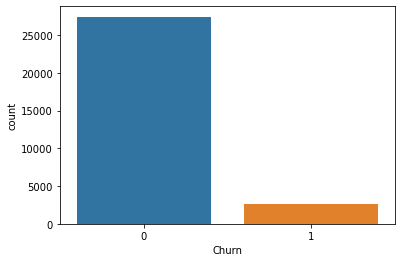

In [28]:
# As we observed earlier, churn rate is low in the overall dataset. The same is being confirmed with
# the graph displayed below:

sns.countplot(x = 'Churn', data = HVC)
plt.show()

<AxesSubplot:xlabel='aon', ylabel='Density'>

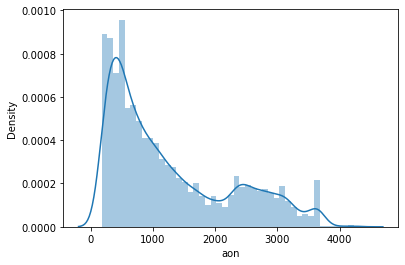

In [29]:
# Let's see how the distribution of users' are over a network using the column 'aon' 

sns.distplot(HVC['aon'])

<AxesSubplot:xlabel='Churn', ylabel='aon'>

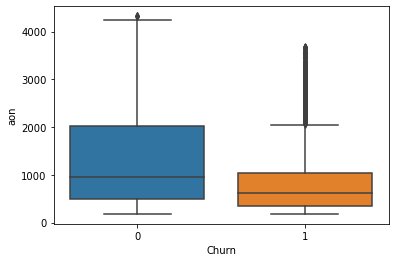

In [30]:
# As seen from the plot given below, there are more outlying behariour for those customers who churn

sns.boxplot(HVC['Churn'], HVC['aon'])

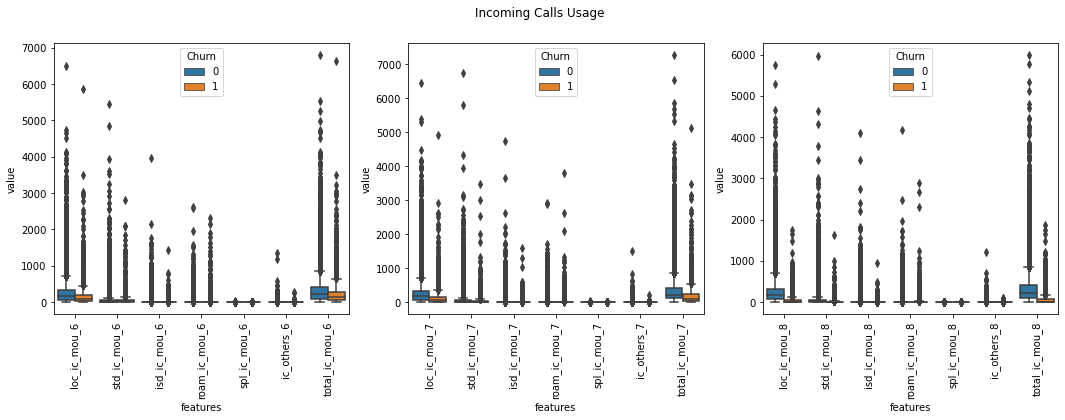

In [31]:
# Upon visualizing data present in columns describing 'Incoming call' usage, we find that 
# almost all the Incoming calls usage columns seem to have outliers at the top percentile.

cols = [['loc_ic_mou_6', 'std_ic_mou_6', 'isd_ic_mou_6', 'roam_ic_mou_6', 'spl_ic_mou_6', 
         'ic_others_6','total_ic_mou_6'],
        ['loc_ic_mou_7', 'std_ic_mou_7', 'isd_ic_mou_7', 'roam_ic_mou_7', 'spl_ic_mou_7',
         'ic_others_7','total_ic_mou_7'],
        ['loc_ic_mou_8', 'std_ic_mou_8', 'isd_ic_mou_8', 'roam_ic_mou_8', 'spl_ic_mou_8', 
         'ic_others_8','total_ic_mou_8']]



# Below, we plot using 'Boxplot()' to check presence of outliers in the incoming calls' usage

plt.figure(figsize=(18, 5))
for i in range(0,3):
    plt.subplot(1,3,i+1)
    X = pd.concat([HVC[cols[i]], HVC['Churn']], axis = 1)
    X = pd.melt(X,id_vars="Churn",var_name="features",value_name='value')
    sns.boxplot(x="features", y="value", hue="Churn", data=X)
    plt.xticks(rotation=90)    
    plt.suptitle('Incoming Calls Usage')

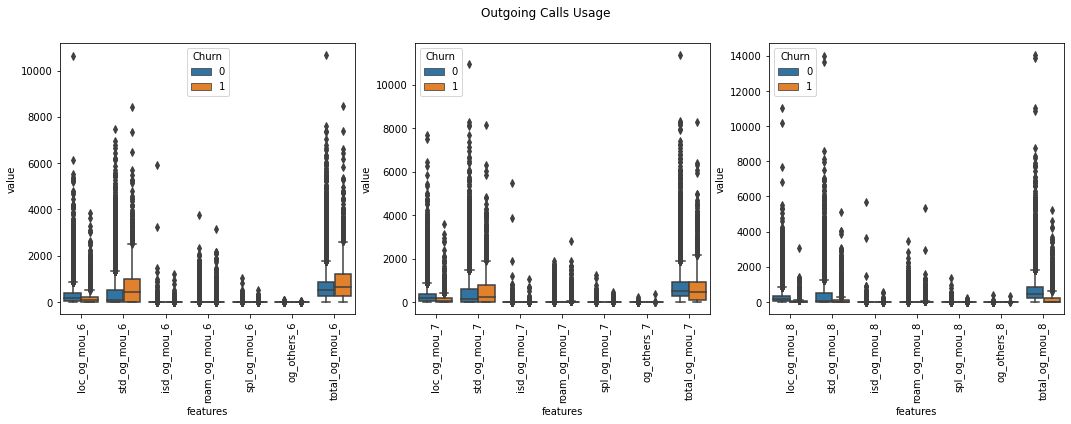

In [32]:
# Upon visualizing data present in columns describing 'Outgoing call' usage, we find that 
# almost all the Outgoing calls usage columns seem to have outliers at the top percentile.

cols = [['loc_og_mou_6', 'std_og_mou_6', 'isd_og_mou_6', 'roam_og_mou_6', 'spl_og_mou_6',
         'og_others_6','total_og_mou_6'],
        ['loc_og_mou_7', 'std_og_mou_7', 'isd_og_mou_7', 'roam_og_mou_7', 'spl_og_mou_7',
         'og_others_7','total_og_mou_7'],
        ['loc_og_mou_8', 'std_og_mou_8', 'isd_og_mou_8', 'roam_og_mou_8', 'spl_og_mou_8',
         'og_others_8','total_og_mou_8']]




# Below, we plot using 'Boxplot()' to check presence of outliers in the outgoing calls' usage

plt.figure(figsize=(18, 5))
for i in range(0,3):
    plt.subplot(1,3,i+1)
    X = pd.concat([HVC[cols[i]], HVC['Churn']], axis=1)
    X = pd.melt(X,id_vars="Churn",var_name="features",value_name='value')
    sns.boxplot(x="features", y="value", hue="Churn", data=X)
    plt.xticks(rotation=90)    
    plt.suptitle('Outgoing Calls Usage')

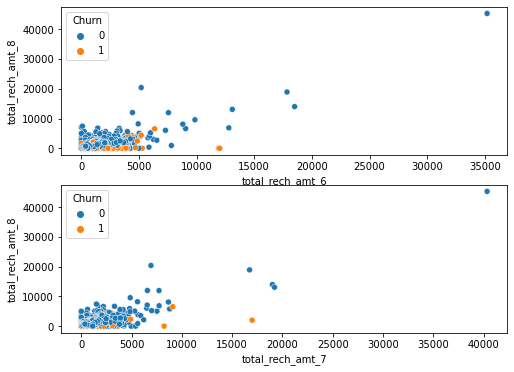

In [33]:
# Let's check the spread of customers who churned or didn't churn using recharge information 
# for the months of June and July i.e., the Good phase 

plt.figure(figsize=(8, 6))
plt.subplot(2,1,1)
sns.scatterplot(x = 'total_rech_amt_6', y = 'total_rech_amt_8', data = HVC, hue = 'Churn')
plt.subplot(2,1,2)
sns.scatterplot(x = 'total_rech_amt_7', y = 'total_rech_amt_8', data = HVC, hue = 'Churn')
plt.show()

In [34]:
# Now, we'll check MULTI-COLLINEARITY
# For this, we'll have to club all features which have information related to 'amt', '3g', '2g', etc.
# and create different DataFrames with them so that we can check MULTI-COLLINEARITY among similar
# columns

amt_data = HVC.loc[:, (HVC.columns.str.contains('amt'))]
data3g = HVC.loc[:, (HVC.columns.str.contains('3g'))]
data2g = HVC.loc[:, (HVC.columns.str.contains('2g'))]
tot_data = HVC.loc[:, (HVC.columns.str.contains('tot'))]

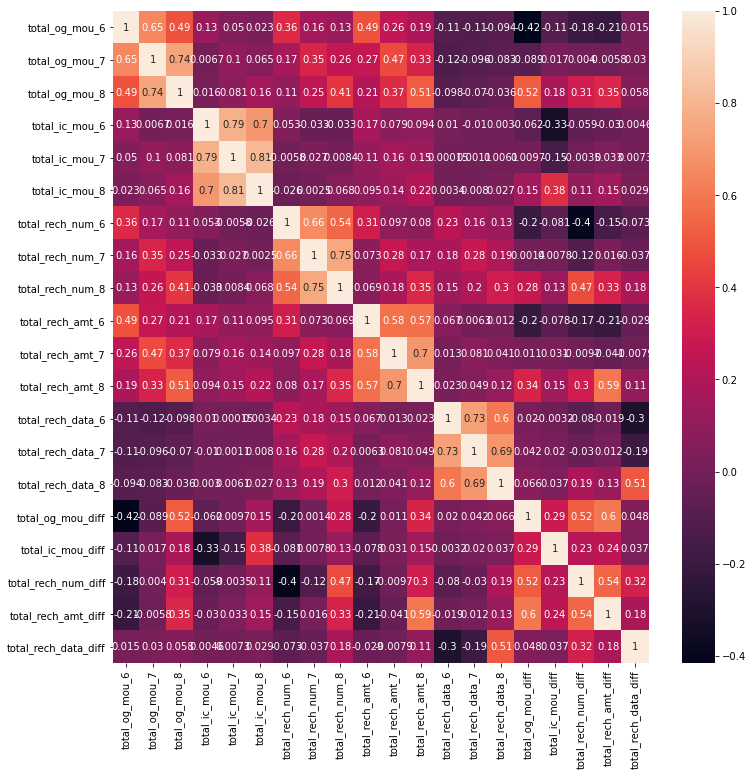

In [35]:
# Using heatmap() we saw there is HIGH corelation between features showing data for the moths of 
# July and August

plt.figure(figsize = (12,12))
sns.heatmap(tot_data.corr(), annot = True)
plt.show()

#### Observations
- There is greater than 70% and in some cases 82% correlation between months 7 and 8 regarding Incoming & Outgoing minutes of usage
- This is probabaly due to the fact that if there is heavy usage in month 7 then subsequently in month 8 there is also heavy usage - The cusotmer will not churn if there is heavy usage and vice versa

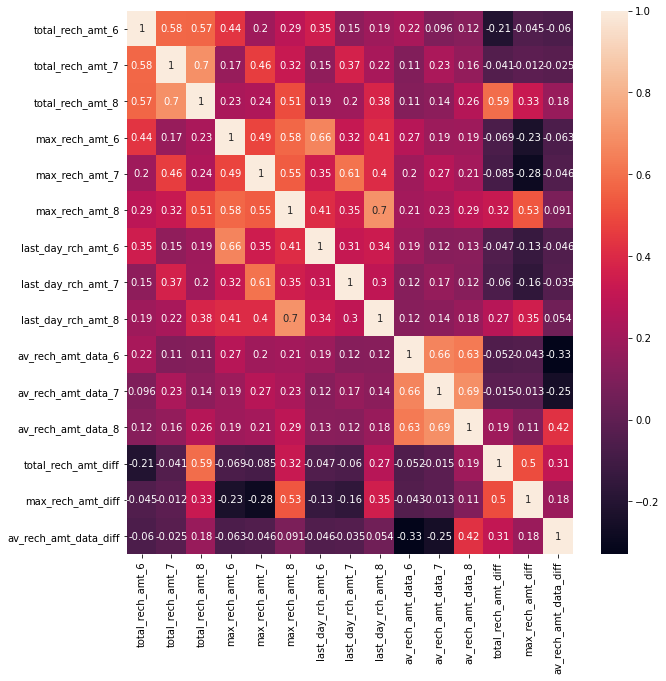

In [36]:
# Using heatmap() we saw there is HIGH corelation between features showing data for the months of 
# July and August

plt.figure(figsize = (10,10))
sns.heatmap(amt_data.corr(),annot = True)
plt.show()

#### Observations
- Some of this correlation is the same as the First Recharge Amount correlation
- There is also higher correlation between the Max Recharge Amount in month 8 (Bad Phase) and the Last Day Recharge Amount
- This could indicate that if a customer is not going to Churn then they Recharge for a higher amount in month 8

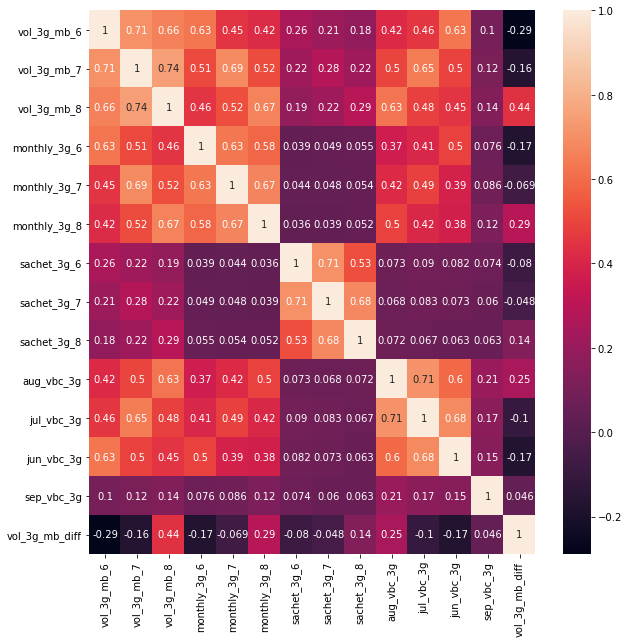

In [37]:
# Using heatmap() we saw there is HIGH corelation between '3g data usage' and 'Avg Revenue'

plt.figure(figsize = (10,10))
sns.heatmap(data3g.corr(),annot = True)
plt.show()

#### Observations
- 70% correlation between Average revenue per user and the 3G Volume of data usage for all Months

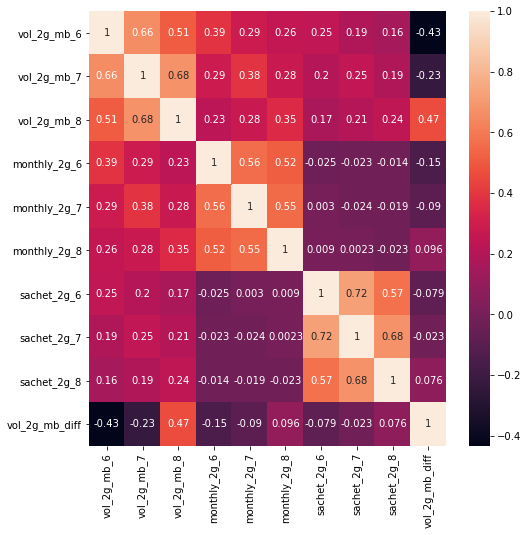

In [38]:
# Using heatmap() we saw there is HIGH corelation between 'Data Sachets' and 'Number of recharges'

plt.figure(figsize = (8,8))
sns.heatmap(data2g.corr(),annot = True)
plt.show()

#### Observations
- Very High correlation between the Recharge Sachets and the Count of Recharges for all months

## Step 9 : Training Model1 for `Feature Selection and Dimesionality Reduction using PCA`

### Preprocessing data for PCA

In [41]:
# prepare the dataset by dividing into independent variables and target variable

churn = HVC['Churn']                        # This is our target variable
data = HVC.drop('Churn', axis = 1)          # These are our independent variables

# Since, we have few categorical variables present in our independent variables, let's split them 
# into two different DataFrames so that we can prepare them accordingly for our model training

# Creating a list of all categorical features present in our independent varaibles

cat_cols = ['night_pck_user_6','monthly_2g_6','sachet_2g_6','monthly_3g_6','sachet_3g_6','fb_user_6',
            'night_pck_user_7','monthly_2g_7','sachet_2g_7','monthly_3g_7','sachet_3g_7','fb_user_7',
            'night_pck_user_8','monthly_2g_8','sachet_2g_8','monthly_3g_8','sachet_3g_8','fb_user_8'] 


# Using set(), we are segregating numerical features from categorical ones

num_cols = list(set(data.columns).difference(set(cat_cols)))


### Dummy encode the categorical features
#### Add columns for each category using `dummy encoding` and drop the original columns

In [40]:
# Below, we dummy encode the categorical columns and drop the first dummy variable thus created 
# since we need only (n-1) variables to fully explain n categories

data = pd.concat([data, pd.get_dummies(data[cat_cols], drop_first=True)], axis = 1)

# Now, since, we have successfully created dummy variables, we can drop the original categorical
# columns using 'drop()'

data.drop(cat_cols, axis = 1, inplace=True)

### Log Transform the numerical features

In [41]:
# Since, there are outliers present in our numerical features, PCA will not perform on it. Hence,
# we have to perform outlier treatment on it. Below, we are using 'Log Transformation' for outlier
# treatment

data[num_cols] = np.log((10000 + data[num_cols]))
data = np.log((10000 + data))
data['vol_3g_mb_diff'] = data['vol_3g_mb_diff'].fillna((data['vol_3g_mb_diff'].median()))

### Standardize the numerical features

In [42]:
# Although, we have log transformed our data to treat outliers, they are still in different ranges
# Hence, we now standardize it to bring all the numerical features under same range. For this, we 
# simply subtract each feature by it's mean and divide it with it's standard deviation. Doing so, 
# will bring all the datapoints within one standard deviation scattered around mean 

data[num_cols] = ((data[num_cols] - data[num_cols].mean()) / data[num_cols].std())

In [43]:
# Checking number of columns/features present in the data-set before performing train-test split

data.shape

(30019, 154)

### Train Test split

In [44]:
# In order to train our first model using PCA for dimentionality reduction, we first have to split
# our data-set into training and test sets so that we can train it on our Training set and then 
# test/predict on our test set

X = data                         # These are our independent variables 
Y = churn                        # This is our target varibale
                                 # Below, we use train_test_split of sklearn with test set's size 30%
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = True)


# Checking shape of each train and test sets thus created:

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(21013, 154) (21013,)
(9006, 154) (9006,)


## Applying PCA

In [45]:
# First we initialize a variable/object named 'pca' 

pca = PCA(svd_solver = 'randomized', random_state = True)


# Now, we'll use the 'pca' variable defined above to train/fit on our training dataset

pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=True,
    svd_solver='randomized', tol=0.0, whiten=False)

### SCREEPLOT

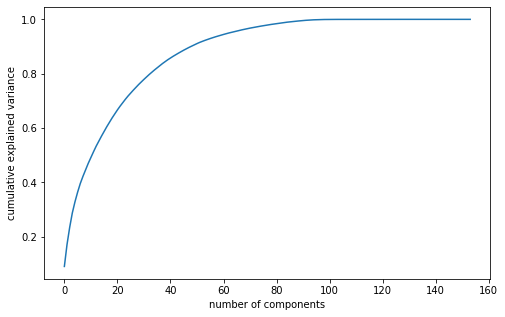

In [46]:
# In order to figure out how many PCA components are required for the final selected model, we'll 
# use Screeplot to check and pick the right number of PC components to build the model such that 
# atleast 95% of data variance should be explained by our selected PCA components


plt.figure(figsize = (8,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

### As seen above, 65 PCA components can explain approx. 95% variance. Hence, we'll take 65 PCA components for further analysis 

In [47]:
# Creating an object with required variables so that the requisite model can be trained

model1 = Pipeline([('scaler', StandardScaler()), ("pca", PCA(n_components = 65)), 
                     ("logistic", LogisticRegression(class_weight = 'balanced'))])


# Now, we'll fit the model on our training dataset

model1.fit(X_train, Y_train)


# Since, now, our model is ready and trained, let's check it's sccore 

model1.score(X_train, Y_train)

0.8259648788845001

### Predict model on Test set

In [48]:
# Predict 'churn' on test data using model trained with 65 PCA components on our training data-set

pred = model1.predict(X_test)



# To evaluate our model, we'll be creating `Confusion Matrix` based on our model's prediction

matrix = confusion_matrix(Y_test, pred)



# Now, that we have the confusion matrix, let's define variables for TP, TN, FP and FN so that we can
# calculate Sensitivity and Specificity

TP = matrix[1,1]          # True Positive 
TN = matrix[0,0]          # True Negatives
FP = matrix[0,1]          # False Positives
FN = matrix[1,0]          # False Negatives

print("Sensitivity is : ", (TP / float(TP+FN)))
print("Specificity is : ", (TN / float(TN+FP)))

Sensitivity is :  0.8121059268600253
Specificity is :  0.820893705101668


#### Hyperparameter Tuning

In [49]:
# let's check class imbalance first
Y_train.value_counts()/Y_train.shape

0    0.914482
1    0.085518
Name: Churn, dtype: float64

In [50]:
# initialize PCA object
pca = PCA()

# logistic regression
# the class weight is used to handle class imbalance - it adjusts the cost function
logistic = LogisticRegression(class_weight={0:0.1, 1: 0.9})

# create pipeline
steps = [("scaler", StandardScaler()), ("pca", pca), ("logistic", logistic)]

# compile pipeline
pca_logistic = Pipeline(steps)

# hyperparameter space
params = {'pca__n_components': [60, 80], 'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 
          'logistic__penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=pca_logistic, cv=folds, param_grid=params, scoring='roc_auc', 
                     n_jobs=-1, verbose=1)

In [51]:
# fit the model

model.fit(X_train, Y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   48.1s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:  3.3min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=None,
                                            random_state=None,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('logistic',
                                        LogisticRe...
                                                           multi_class='warn',
       

In [52]:
# cross validation results

pd.DataFrame(model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logistic__C,param_logistic__penalty,param_pca__n_components,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,2.586178,0.090826,0.062934,0.009305,0.1,l1,60,"{'logistic__C': 0.1, 'logistic__penalty': 'l1'...",0.894596,0.901392,0.891672,0.886287,0.888194,0.892429,0.005315,32
1,3.192952,0.230728,0.061623,0.011032,0.1,l1,80,"{'logistic__C': 0.1, 'logistic__penalty': 'l1'...",0.895888,0.900580,0.894316,0.888850,0.886796,0.893287,0.004957,26
2,3.483472,0.300562,0.056214,0.008770,0.1,l2,60,"{'logistic__C': 0.1, 'logistic__penalty': 'l2'...",0.894570,0.902286,0.890600,0.886734,0.890662,0.892971,0.005276,31
3,3.889294,0.143524,0.063636,0.005189,0.1,l2,80,"{'logistic__C': 0.1, 'logistic__penalty': 'l2'...",0.897873,0.901917,0.893060,0.889783,0.886514,0.893830,0.005518,15
4,3.480349,0.483097,0.075193,0.022400,0.5,l1,60,"{'logistic__C': 0.5, 'logistic__penalty': 'l1'...",0.894674,0.902631,0.890557,0.887086,0.890445,0.893079,0.005348,30
5,4.004092,0.338989,0.079695,0.013742,0.5,l1,80,"{'logistic__C': 0.5, 'logistic__penalty': 'l1'...",0.897909,0.901941,0.893066,0.890355,0.886733,0.894002,0.005391,12
6,3.548224,0.348215,0.048511,0.007563,0.5,l2,60,"{'logistic__C': 0.5, 'logistic__penalty': 'l2'...",0.894588,0.902758,0.890080,0.887360,0.891251,0.893208,0.005309,28
7,4.608495,0.137563,0.054946,0.007003,0.5,l2,80,"{'logistic__C': 0.5, 'logistic__penalty': 'l2'...",0.897842,0.901966,0.892870,0.890804,0.886435,0.893984,0.005421,14
8,3.162420,0.689689,0.053120,0.012497,1,l1,60,"{'logistic__C': 1, 'logistic__penalty': 'l1', ...",0.894713,0.902968,0.890976,0.887289,0.890862,0.893362,0.005347,25
9,3.832662,1.201134,0.057388,0.005339,1,l1,80,"{'logistic__C': 1, 'logistic__penalty': 'l1', ...",0.898021,0.901875,0.893202,0.890581,0.886287,0.893994,0.005477,13


In [53]:
# print best hyperparameters

print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.8942298152652477
Best hyperparameters:  {'logistic__C': 4, 'logistic__penalty': 'l2', 'pca__n_components': 80}


In [54]:
# predict churn on test data
y_pred = model.predict(X_test)

# create onfusion matrix
matrix = confusion_matrix(Y_test, y_pred)



# Creating variables for TP, TN, FP and FN

TP = matrix[1,1]          # True Positive 
TN = matrix[0,0]          # True Negatives
FP = matrix[0,1]          # False Positives
FN = matrix[1,0]          # False Negatives
print("Sensitivity is : ", (TP / float(TP+FN)))
print("Specificity is : ", (TN / float(TN+FP)))

# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(Y_test, y_pred_prob),2))

Sensitivity is :  0.7931904161412359
Specificity is :  0.8442712772433946
AUC:    	 0.88


## Choosing best features for Business Insights

#### We will use Randon forest for this

In [55]:
# random forest - the class weight is used to handle class imbalance - it adjusts the cost function
forest = RandomForestClassifier(class_weight={0:0.1, 1: 0.9}, n_jobs = -1)

# hyperparameter space
params = {"criterion": ['gini', 'entropy'], "max_features": ['auto', 0.4]}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=forest, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, 
                     verbose=1)

In [56]:
# fit model

model.fit(X_train, Y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   30.6s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight={0: 0.1, 1: 0.9},
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=-1,
                                              oob_score=False,
                                

In [57]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.8904277814032733
Best hyperparameters:  {'criterion': 'entropy', 'max_features': 0.4}


In [58]:
# predict churn on test data
y_pred = model.predict(X_test)

# create onfusion matrix
matrix = confusion_matrix(Y_test, y_pred)

# Creating variables for TP, TN, FP and FN

TP = matrix[1,1]          # True Positive 
TN = matrix[0,0]          # True Negatives
FP = matrix[0,1]          # False Positives
FN = matrix[1,0]          # False Negatives
print("Sensitivity is : ", (TP / float(TP+FN)))
print("Specificity is : ", (TN / float(TN+FP)))

# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(Y_test, y_pred_prob),2))

Sensitivity is :  0.44766708701134933
Specificity is :  0.9859978083526117
AUC:    	 0.88


Poor sensitivity. The best model is PCA along with Logistic regression.

In [59]:
# run a random forest model on train data
max_features = int(round(np.sqrt(X_train.shape[1])))  # No of variables to consider to split each node
print(max_features)

rf_model = RandomForestClassifier(n_estimators=100, max_features=max_features, 
                                  class_weight={0:0.1, 1: 0.9}, oob_score=True, random_state=4, 
                                  verbose=1)

12


In [60]:
# fit model
rf_model.fit(X_train, Y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   16.9s finished


RandomForestClassifier(bootstrap=True, class_weight={0: 0.1, 1: 0.9},
                       criterion='gini', max_depth=None, max_features=12,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=True,
                       random_state=4, verbose=1, warm_start=False)

In [61]:
# OOB score
rf_model.oob_score_

0.9401322990529672

In [62]:
# predict churn on test data
y_pred = rf_model.predict(X_test)

# create onfusion matrix
matrix = confusion_matrix(Y_test, y_pred)

# Creating variables for TP, TN, FP and FN

TP = matrix[1,1]          # True Positive 
TN = matrix[0,0]          # True Negatives
FP = matrix[0,1]          # False Positives
FN = matrix[1,0]          # False Negatives
print("Sensitivity is : ", (TP / float(TP+FN)))
print("Specificity is : ", (TN / float(TN+FP)))

# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(Y_test, y_pred_prob),2))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Sensitivity is :  0.4426229508196721
Specificity is :  0.9881894557408986
AUC:    	 0.88


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished


### Feature Importance

In [63]:
# predictors
features = X_test.columns

# feature_importance
importance = rf_model.feature_importances_

# create dataframe
feature_importance = pd.DataFrame({'variables': features, 'importance_percentage': importance*100})
feature_importance = feature_importance[['variables', 'importance_percentage']]

# sort features
feature_importance = feature_importance.sort_values('importance_percentage', 
                                                    ascending=False).reset_index(drop=True)
print("Sum of importance=", feature_importance.importance_percentage.sum())
feature_importance

Sum of importance= 100.0


,variables,importance_percentage
0,loc_ic_t2m_mou_8,4.056002
1,loc_ic_mou_8,3.746336
2,total_ic_mou_8,3.658395
3,loc_og_t2m_mou_8,3.116789
4,total_rech_amt_diff,2.963593
5,total_og_mou_8,2.869141
6,loc_og_mou_8,2.811755
7,arpu_diff,2.804569
8,arpu_8,2.504827
9,loc_og_t2t_mou_8,2.276323


### Extracting top 30 features

In [64]:
top_features = feature_importance.variables[0:30]

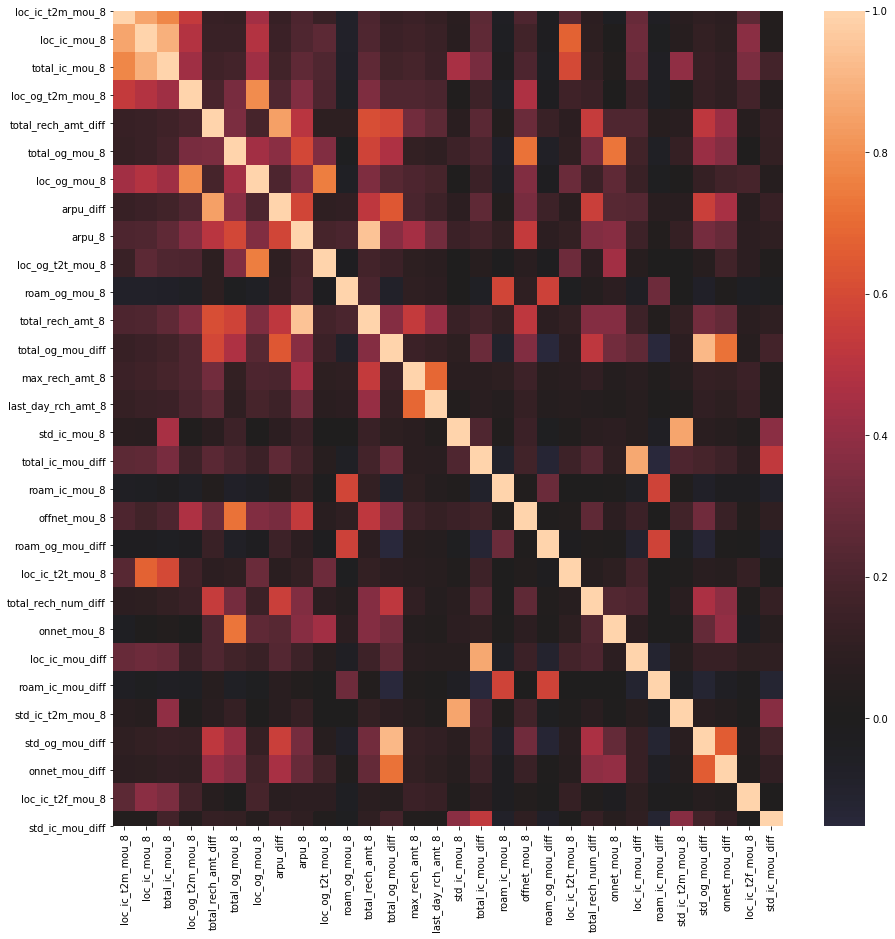

In [65]:
# plot feature correlation
plt.figure(figsize = (15,15))
mycmap = sns.diverging_palette(199, 359, s=99, center="light", as_cmap=True)
sns.heatmap(data=X_train[top_features].corr(), center=0.0,)

In [66]:
# selecting features which are not co-relating much

top_features = ['total_ic_mou_8', 'total_rech_amt_diff', 'total_og_mou_8', 'arpu_8', 'roam_ic_mou_8',
                'roam_og_mou_8', 'std_ic_mou_8', 'av_rech_amt_data_8', 'std_og_mou_8']

X_train = X_train[top_features]
X_test = X_test[top_features]

In [67]:
# logistic regression
steps = [('scaler', StandardScaler()), 
         ("logistic", LogisticRegression(class_weight={0:0.1, 1:0.9}))
        ]

# compile pipeline
logistic = Pipeline(steps)

# hyperparameter space
params = {'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=logistic, cv=folds, param_grid=params, scoring='roc_auc', 
                     n_jobs=-1, verbose=1)

In [68]:
# fit model
model.fit(X_train, Y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    9.3s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('logistic',
                                        LogisticRegression(C=1.0,
                                                           class_weight={0: 0.1,
                                                                         1: 0.9},
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ra

In [69]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.8828050406553889
Best hyperparameters:  {'logistic__C': 10, 'logistic__penalty': 'l1'}


In [70]:
# predict churn on test data

y_pred = model.predict(X_test)


# create onfusion matrix

matrix = confusion_matrix(Y_test, y_pred)


# Creating variables for TP, TN, FP and FN

TP = matrix[1,1]          # True Positive 
TN = matrix[0,0]          # True Negatives
FP = matrix[0,1]          # False Positives
FN = matrix[1,0]          # False Negatives
print("Sensitivity is : ", (TP / float(TP+FN)))
print("Specificity is : ", (TN / float(TN+FP)))


# check area under curve

y_pred_prob = model.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(Y_test, y_pred_prob),2))

Sensitivity is :  0.78562421185372
Specificity is :  0.8333130403019603
AUC:    	 0.87


In [71]:
logistic_model = model.best_estimator_.named_steps['logistic']

In [72]:
# intercept

intercept_df = pd.DataFrame(logistic_model.intercept_.reshape((1,1)), columns = ['intercept'])

In [73]:
# coefficients

coefficients = logistic_model.coef_.reshape((9, 1)).tolist()
coefficients = [val for sublist in coefficients for val in sublist]
coefficients = [round(coefficient, 3) for coefficient in coefficients]

logistic_features = list(X_train.columns)
coefficients_df = pd.DataFrame(logistic_model.coef_, columns=logistic_features)

In [74]:
# concatenate dataframes

coefficients = pd.concat([intercept_df, coefficients_df], axis=1)
coefficients.T

,0
intercept,-1.586693
total_ic_mou_8,-1.349418
total_rech_amt_diff,-0.796138
total_og_mou_8,-1.921375
arpu_8,0.158461
roam_ic_mou_8,0.039386
roam_og_mou_8,0.189146
std_ic_mou_8,0.253892
av_rech_amt_data_8,-0.612846
std_og_mou_8,1.308048


## Business Insights


1. Most important features are as follows:
 - total_ic_mou_8 
 - total_rech_amt_diff
 - total_og_mou_8
 - arpu_8
 - roam_ic_mou_8
 - roam_og_mou_8
 - std_ic_mou_8
 - av_rech_amt_data_8
 - std_og_mou_8
 
 
 2. Following features `impact` 'Churn' `NEGATIVELY` :
  - total_og_mou_8 
  - total_ic_mou_8
  - total_rech_amt_diff
 
 
 3. Following features `impact` 'Churn' `POSITIVELY` :
  - std_og_mou_8
  - std_ic_mou_8
  - roam_og_mou_8
  - arpu_8
  - roam_ic_mou_8
 
 
 4. For a customer to prevent 'Churn', we have make note of his/her `STD calls`, incoming and outgoing both, incoming and outgoing calls while on `roaming` and their `average revenue` `FOR THE MONTH OF AUGUST i.e., DURING ACTION PHASE`. 
 
 5. One option could be to `provide better discounts for customers who are on roaming`
 
 6. Also, `Total outgoing and incoming traffic for the month of August` and `difference in the recharge amount between ACTION phase and GOOD phase` will provide a good indicator regarding  whether a customer will Churn or not 
 
 7. Telecom company must focus on customers, if, their `usage` and `recharge amount` takes a dip or vary from their usual trend, as such customers are more prone to Churn